In [136]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

zip_path = tensorflow.keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
                                           fname='jena_climate_2009_2016.csv.zip',
                                           extract=True)

In [137]:
csv_path, _=os.path.splitext(zip_path)
df=pd.read_csv(csv_path)
df=df[5::6] # 5 부터, step = 6
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        70091 non-null  object 
 1   p (mbar)         70091 non-null  float64
 2   T (degC)         70091 non-null  float64
 3   Tpot (K)         70091 non-null  float64
 4   Tdew (degC)      70091 non-null  float64
 5   rh (%)           70091 non-null  float64
 6   VPmax (mbar)     70091 non-null  float64
 7   VPact (mbar)     70091 non-null  float64
 8   VPdef (mbar)     70091 non-null  float64
 9   sh (g/kg)        70091 non-null  float64
 10  H2OC (mmol/mol)  70091 non-null  float64
 11  rho (g/m**3)     70091 non-null  float64
 12  wv (m/s)         70091 non-null  float64
 13  max. wv (m/s)    70091 non-null  float64
 14  wd (deg)         70091 non-null  float64
dtypes: float64(14), object(1)
memory usage: 8.0+ MB


In [139]:
# 목표값으로 쓰기 위해 삭제
df = df.drop("Tpot (K)", axis=1)

In [140]:
# 결측치확인
print(df.isnull().sum().sum())

0


In [141]:
# 중복치 확인
df.duplicated().sum()

24

In [142]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

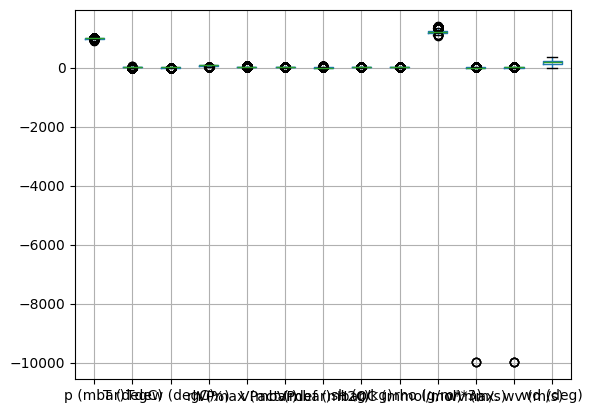

In [143]:
# 이상치 확인 후 수정
df.boxplot()
plt.show()

In [144]:
print(df["wv (m/s)"].min())
print(df["max. wv (m/s)"].min())

-9999.0
-9999.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26452\640356924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wv (m/s)"][df["wv (m/s)"]==-9999.0]=0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_26452\640356924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["max. wv (m/s)"][df["max. wv (m/s)"]==-9999.0]=0


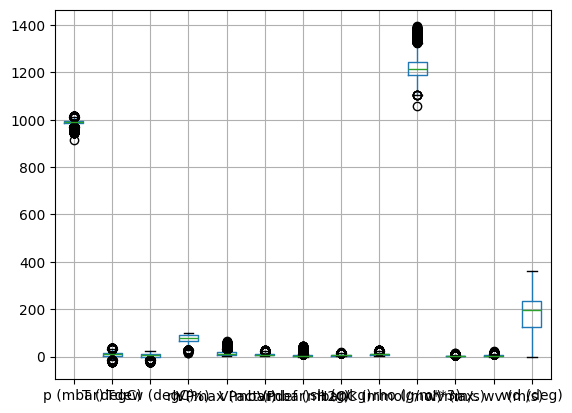

In [145]:
df["wv (m/s)"][df["wv (m/s)"]==-9999.0]=0
df["max. wv (m/s)"][df["max. wv (m/s)"]==-9999.0]=0
df.boxplot()
plt.show()

In [146]:
#"Date Time" 열을 index 화

df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
df.set_index("Date Time", inplace=True)
df.head()

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [147]:
# input, target 분리
target = df["T (degC)"]
input = df.drop("T (degC)", axis=1)

In [148]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49046, 12) (21021, 12) (49046,) (21021,)


In [149]:
# scaling: StandardScaler(Z-score)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_ss=ss.transform(X_train)
X_test_ss=ss.transform(X_test)

In [150]:
# 훈련(LinearRegression)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_ss, y_train)
print(lr.score(X_train_ss, y_train))
print(lr.score(X_train_ss, y_train))

0.9999252600077393
0.9999252600077393


In [151]:
lr.coef_

array([ 2.23336857e+00, -1.58141025e-01, -1.14280386e-01, -4.46893661e+00,
       -4.32649145e+00,  3.38404606e+00, -1.68885848e+01,  2.40722140e+01,
       -8.10624375e+00,  2.00533503e-03, -2.94817467e-03,  2.48266937e-04])

In [152]:
list(zip(input.columns, lr.coef_))

[('p (mbar)', 2.233368565551197),
 ('Tdew (degC)', -0.15814102542389463),
 ('rh (%)', -0.11428038555800699),
 ('VPmax (mbar)', -4.468936608247777),
 ('VPact (mbar)', -4.3264914493662765),
 ('VPdef (mbar)', 3.3840460645574995),
 ('sh (g/kg)', -16.888584836045883),
 ('H2OC (mmol/mol)', 24.07221401355899),
 ('rho (g/m**3)', -8.106243747505742),
 ('wv (m/s)', 0.0020053350287354554),
 ('max. wv (m/s)', -0.0029481746662289865),
 ('wd (deg)', 0.00024826693690271906)]

In [153]:
from sklearn.linear_model import Lasso
penalties=[0.001,0.01,0.1,1,10,100]
for i in penalties:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train_ss, y_train)
    print("규제 알파:", i)
    print(lasso.score(X_train_ss, y_train))
    print(lasso.score(X_test_ss, y_test))
    print("-"*100)

규제 알파: 0.001
0.9998558800547902
0.9998570977328014
----------------------------------------------------------------------------------------------------
규제 알파: 0.01
0.9998444763166657
0.9998465626436703
----------------------------------------------------------------------------------------------------


C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+02, tolerance: 3.497e+02
  model = cd_fast.enet_coordinate_descent(


규제 알파: 0.1
0.9991160845444632
0.9991497813792352
----------------------------------------------------------------------------------------------------
규제 알파: 1
0.9584880115450247
0.959088584222276
----------------------------------------------------------------------------------------------------
규제 알파: 10
0.0
-2.817445370562055e-06
----------------------------------------------------------------------------------------------------
규제 알파: 100
0.0
-2.817445370562055e-06
----------------------------------------------------------------------------------------------------


In [154]:
lasso=Lasso(alpha=1)
lasso.fit(X_train_ss, y_train)

print(lasso.score(X_train_ss, y_train))
print(lasso.score(X_test_ss, y_test))
print("-"*100)

0.9584880115450247
0.959088584222276
----------------------------------------------------------------------------------------------------


In [155]:
list(zip(input.columns, lasso.coef_))

[('p (mbar)', 0.0),
 ('Tdew (degC)', 1.2546019649611537),
 ('rh (%)', -0.08588383862519937),
 ('VPmax (mbar)', 3.10801380236241),
 ('VPact (mbar)', 0.0),
 ('VPdef (mbar)', 0.0),
 ('sh (g/kg)', 0.0),
 ('H2OC (mmol/mol)', 0.0),
 ('rho (g/m**3)', -3.1781879778079523),
 ('wv (m/s)', 0.0),
 ('max. wv (m/s)', 0.0),
 ('wd (deg)', 0.0)]

In [156]:
from sklearn.linear_model import Ridge


r=Ridge(alpha=5)
r.fit(X_train_ss, y_train)

print(r.score(X_train_ss, y_train))
print(r.score(X_test_ss, y_test))
print("-"*100)

0.9998918968527853
0.9998916027423322
----------------------------------------------------------------------------------------------------


In [157]:
list(zip(input.columns, r.coef_))

[('p (mbar)', 2.030390510148152),
 ('Tdew (degC)', 0.336386067796203),
 ('rh (%)', -0.26348739982853986),
 ('VPmax (mbar)', -0.24199994842732436),
 ('VPact (mbar)', -1.3168723688195145),
 ('VPdef (mbar)', 0.7472884570994046),
 ('sh (g/kg)', 0.6798467013585551),
 ('H2OC (mmol/mol)', 1.0694518329075426),
 ('rho (g/m**3)', -7.646690476916667),
 ('wv (m/s)', 0.003147169399989853),
 ('max. wv (m/s)', -0.003564937971929991),
 ('wd (deg)', 0.0017034398054522931)]

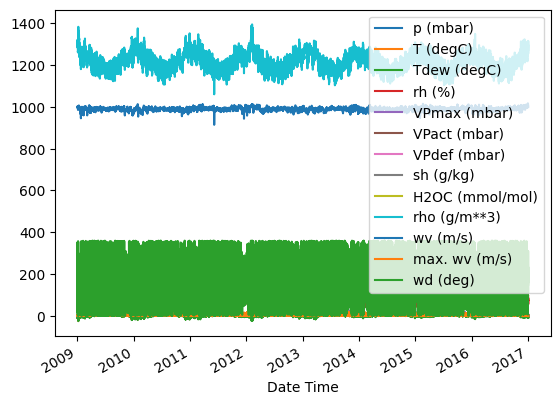

In [158]:
df.plot()
plt.show()

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


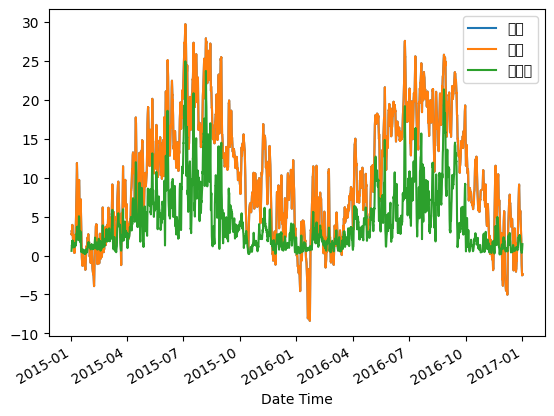

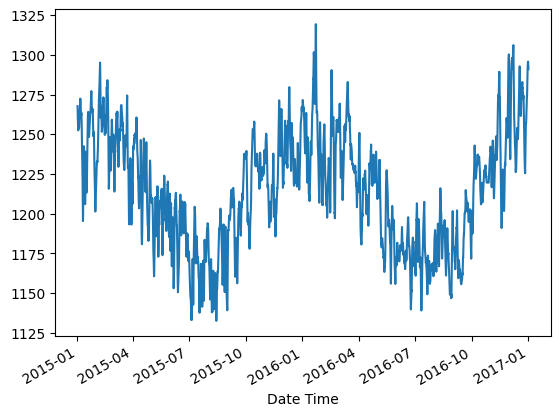

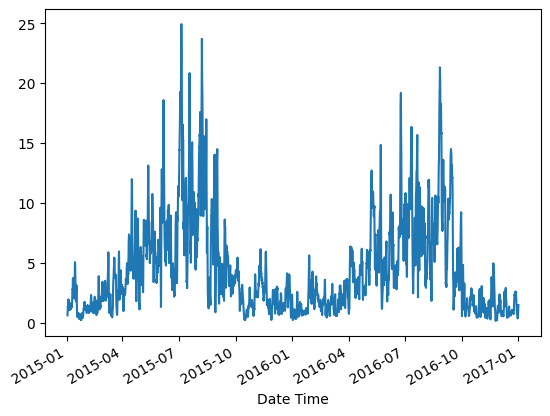

In [161]:
df.sort_index(inplace=True)

df["T (degC)"]["2015":"2017"].rolling(window=24, center=False).mean().plot(label="기온")
df['VPdef (mbar)']["2015":"2017"].rolling(window=24, center=False).mean().plot(label="증기압")
plt.legend()
plt.show()

df['rho (g/m**3)']["2015":"2017"].rolling(window=24, center=False).mean().plot()
plt.show()
df['VPdef (mbar)']["2015":"2017"].rolling(window=24, center=False).mean().plot()
plt.show()